In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_n_encoded_data.csv")
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,23,7,3


In [3]:
df.shape

(700, 16)

In [4]:
# making absenties hours column categorical
df['Absenteeism Time in Hours'].value_counts()

Absenteeism Time in Hours
8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
120      2
56       2
80       2
112      2
7        1
104      1
48       1
Name: count, dtype: int64

In [5]:
# renaming target column
col_idx = list(df.columns).index('Absenteeism Time in Hours')
new_names = list(df.columns)
new_names[col_idx] = 'Absent Hours'
df.columns = new_names
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absent Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,4,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,2,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,4,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,2,0,0,0,1,23,7,3


In [6]:
print('mean', df['Absent Hours'].mean(), sep=': ')
print('median', df['Absent Hours'].median(), sep=': ')
print('mode', df['Absent Hours'].mode(), sep=': ')

mean: 6.761428571428572
median: 3.0
mode: 0    8
Name: Absent Hours, dtype: int64


#### Converting to categorical
- 0: <= 3 hours
- 1: more than 3 hours

In [7]:
import numpy as np
df['Absent Hours'] = np.where(df['Absent Hours'] <= 3, 0, 1)

In [8]:
df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absent Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day,Month,Weekday
0,289,36,33,239.554,30,0,2,1,1,0,0,0,1,7,7,1
1,118,13,50,239.554,31,0,1,0,0,0,0,0,0,14,7,1
2,179,51,38,239.554,31,0,0,0,0,0,0,0,1,15,7,2
3,279,5,39,239.554,24,0,2,0,1,1,0,0,0,16,7,3
4,289,36,33,239.554,30,0,2,1,0,0,0,0,1,23,7,3


In [9]:
df['Absent Hours'].value_counts()

Absent Hours
0    381
1    319
Name: count, dtype: int64

We've a good proportion of values.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
x = df.drop('Absent Hours', axis=1)
y = df['Absent Hours']

print(x.head())
print(y.head())

   Transportation Expense  Distance to Work  Age  Daily Work Load Average  \
0                     289                36   33                  239.554   
1                     118                13   50                  239.554   
2                     179                51   38                  239.554   
3                     279                 5   39                  239.554   
4                     289                36   33                  239.554   

   Body Mass Index  Education  Children  Pets  Reason_1  Reason_2  Reason_3  \
0               30          0         2     1         0         0         0   
1               31          0         1     0         0         0         0   
2               31          0         0     0         0         0         0   
3               24          0         2     0         1         0         0   
4               30          0         2     1         0         0         0   

   Reason_4  Day  Month  Weekday  
0         1    7      7    

In [12]:
df.shape

(700, 16)

In [13]:
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
print(
    f"x_train shape: {x_train.shape},",
    f"y_train shape: {y_train.shape},",
    f"X_test shape: {X_test.shape},",
    f"Y_test shape: {Y_test.shape}"
)

x_train shape: (560, 15), y_train shape: (560,), X_test shape: (140, 15), Y_test shape: (140,)


## Training the model

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\Dmm\anaconda3\envs\innoquest-ds\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
acc_train = model.score(x_train, y_train)
print(f"Training accuracy: {acc_train}")

y_pred = model.predict(X_test)
acc_test = accuracy_score(Y_test, y_pred)
print(f"Test accuracy: {acc_test}")

Training accuracy: 0.7125
Test accuracy: 0.75


In [17]:
import pickle

# saving the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

## Training with normalized data

#### Normalizing data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(x_train)

scaler.mean_

array([2.23037500e+02, 3.00696429e+01, 3.65857143e+01, 2.71313466e+02,
       2.67482143e+01, 1.62500000e-01, 9.64285714e-01, 5.94642857e-01,
       2.48214286e-01, 5.35714286e-03, 9.82142857e-02, 5.91071429e-01,
       1.58678571e+01, 6.26607143e+00, 2.02857143e+00])

In [20]:
# saving the scalar for future use

with open("scaling-info.txt", "w") as file:
    file.write(f'Columns: \n{str(list(x_train.columns))}\n\n')
    file.write(f"Mean used to scale: \n{str(scaler.mean_)}")

import pickle

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
    

In [21]:
x_train = scaler.transform(x_train)
X_test = scaler.transform(X_test)

x_train

array([[-0.66315807,  1.39594288,  0.21984318, ..., -1.34275965,
         1.35757151,  0.64980347],
       [ 0.02955317, -0.27142341, -1.33460355, ...,  1.49896632,
         0.78402187, -1.35694253],
       [ 0.34579091, -0.33811806,  0.6861772 , ..., -1.21920634,
        -0.07630259, -1.35694253],
       ...,
       [-0.66315807,  1.39594288,  0.21984318, ..., -1.34275965,
         0.78402187, -1.35694253],
       [ 0.02955317, -0.27142341, -1.33460355, ...,  0.13987999,
        -0.3630774 , -0.01911187],
       [ 0.02955317, -0.27142341, -1.33460355, ..., -1.58986625,
         1.64434633,  0.64980347]], shape=(560, 15))

In [22]:
X_test

array([[-0.66315807, -0.53820202,  0.53073253, ..., -0.10722662,
        -0.93662704, -0.6880272 ],
       [-0.66315807, -0.27142341, -1.0237142 , ..., -0.97209974,
         0.78402187,  1.3187188 ],
       [-0.66315807, -0.53820202,  0.53073253, ..., -0.23077992,
        -0.93662704, -0.6880272 ],
       ...,
       [ 0.55661607,  1.32924822, -0.09104617, ..., -0.47788653,
        -0.3630774 ,  1.3187188 ],
       [ 1.02344321,  0.06204985,  0.53073253, ...,  0.01632669,
         0.78402187,  1.3187188 ],
       [-1.58175341, -1.33853784,  0.06439851, ..., -0.60143983,
         1.64434633,  1.3187188 ]], shape=(140, 15))

In [23]:
x_train.shape

(560, 15)

In [24]:
df.shape

(700, 16)

The shaped are fine. Let's retrain the model.

#### Training model

In [25]:
s_model = LogisticRegression()
s_model.fit(x_train, y_train)

LogisticRegression()

In [26]:
acc_train = s_model.score(x_train, y_train)
print(f"Training accuracy: {acc_train}")

y_pred = s_model.predict(X_test)
acc_test = accuracy_score(Y_test, y_pred)
print(f"Test accuracy: {acc_test}")

Training accuracy: 0.7857142857142857
Test accuracy: 0.7357142857142858


- Not much difference.

## Accuracy
- Got accuracy of 75% (unscaled data).

## Analyzing model

In [27]:
s_model.coef_

array([[ 0.87389738, -0.12614229, -0.35212954, -0.00470146,  0.28413708,
        -0.21126903,  0.43832727, -0.52927462,  2.2253132 ,  0.28916548,
         1.65498387,  1.5274079 ,  0.09850048,  0.0994774 , -0.1459054 ]])

In [29]:
s_model.intercept_

array([-0.16767048])

In [30]:
s_model.coef_.size

15

In [46]:
coefs = [float(coef) for coef in s_model.coef_.T]

C:\Users\Dmm\AppData\Local\Temp\ipykernel_10720\1488395845.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coefs = [float(coef) for coef in s_model.coef_.T]


In [47]:
analysis = pd.DataFrame({'Features': x.columns.tolist(), 'Coefficients': coefs})
analysis

,Features,Coefficients
0,Transportation Expense,0.873897
1,Distance to Work,-0.126142
2,Age,-0.352130
3,Daily Work Load Average,-0.004701
4,Body Mass Index,0.284137
5,Education,-0.211269
6,Children,0.438327
7,Pets,-0.529275
8,Reason_1,2.225313
9,Reason_2,0.289165


In [ ]:
# alternative method - more good
coefs = s_model.coef_.tolist()[0]
feat_names = x.columns.tolist()

analysis = pd.DataFrame({'Features': feat_names, 'Coefficients': coefs})
analysis

,Features,Coefficients
0,Transportation Expense,0.873897
1,Distance to Work,-0.126142
2,Age,-0.352130
3,Daily Work Load Average,-0.004701
4,Body Mass Index,0.284137
5,Education,-0.211269
6,Children,0.438327
7,Pets,-0.529275
8,Reason_1,2.225313
9,Reason_2,0.289165


In [62]:
analysis.sort_values(by='Coefficients', ascending=False).reset_index(drop=True)

,Features,Coefficients
0,Reason_1,2.225313
1,Reason_3,1.654984
2,Reason_4,1.527408
3,Transportation Expense,0.873897
4,Children,0.438327
5,Reason_2,0.289165
6,Body Mass Index,0.284137
7,Month,0.099477
8,Day,0.098500
9,Daily Work Load Average,-0.004701


In [63]:
analysis.to_csv("feature-importance.csv", index=False)

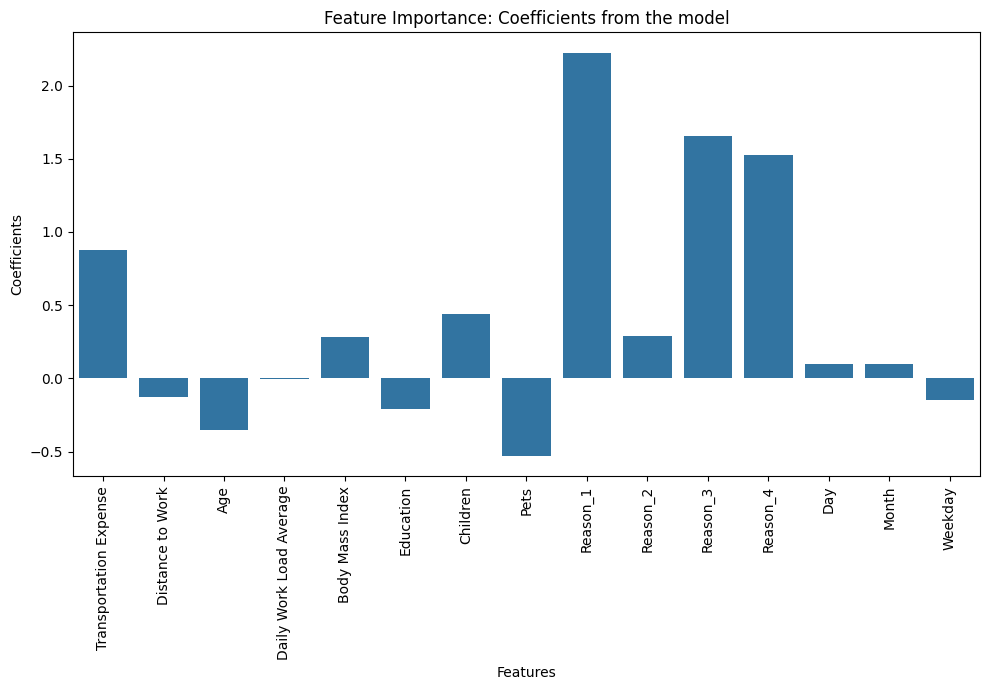

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Feature Importance: Coefficients from the model")
plt.xticks(rotation=90)
sns.barplot(analysis, x='Features', y='Coefficients')
plt.tight_layout()
plt.savefig("feature-analysis.png", bbox_inches='tight', dpi=300)
plt.show()